# Random Forest

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('pima.csv')
data.sample(5)
data.columns
X=data.drop("Outcome",axis=1)
y=data["Outcome"]
np.random.seed(42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,stratify=y,test_size=0.10)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(Y_test,y_pred))
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy-DecisionTree :",accuracy_score(Y_test,Y_pred))

Accuracy: 0.8051948051948052
Accuracy-DecisionTree : 0.7532467532467533


# Navie Bayes

Accuracy: 0.8

Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



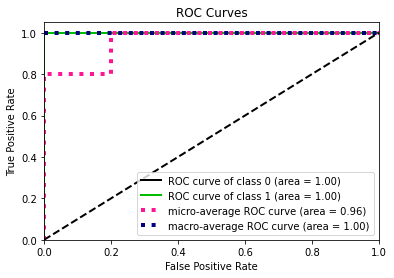

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('covid.csv')
data.head()
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)
X = data.iloc[:, 1:-1].values
Y = data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size = 0.2,random_state=111)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("\nReport")
print(classification_report(Y_test,y_pred))
import scikitplot as skplt
import matplotlib.pyplot as plt
y_prob = model.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_prob)
plt.show()

# SVM

In [3]:
import numpy as np
import pandas as pd
np.random.seed(42)
data=pd.read_csv('glass.csv')
data.head()
x=data.drop('Type',axis=1)
y=data.Type
from sklearn.model_selection import train_test_split
from sklearn import svm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
linear=svm.SVC(kernel='linear')
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
model1=svm.SVC(kernel='sigmoid')
model2=svm.SVC(kernel='poly')
model3=svm.SVC(kernel='rbf')
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))

0.9846153846153847
[[18  1  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        10

    accuracy                           0.98        65
   macro avg       0.99      0.99      0.99        65
weighted avg       0.99      0.98      0.98        65

0.5846153846153846
0.9846153846153847
0.8


# PCA

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64
[2.93808505 0.9201649  0.14774182 0.02085386] 

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Variance of each feature [72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]


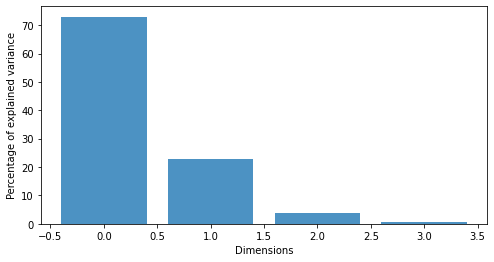

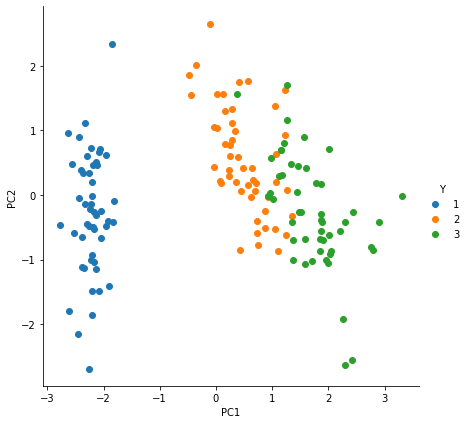

In [4]:
import pandas as pd

data = pd.read_csv("iris.csv")
data.head(5)
y = data["species"]

# Input data
X = data.drop("species", 1)

print(X[:5], "\n")
print(y[:5])
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled[:4]
import numpy as np
# Covariance Matrix
features = x_scaled.T
covMatrix = np.cov(features)
covMatrix
# Eigen values and Eigen vector
values, vectors = np.linalg.eig(covMatrix)
print(values, "\n")
print(vectors)

# Variance of each feature w.r.t eigen vlaues
explained_variance = []
for i in range(len(values)):
  res = values[i]/np.sum(values)*100
  explained_variance.append(res)

print("Variance of each feature", explained_variance)

import matplotlib.pyplot as plt
import seaborn as sns

# Bar graph
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.8)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Dimensions")

plt.show()

pro_1 = x_scaled.dot(vectors.T[0])
pro_2 = x_scaled.dot(vectors.T[1])

result = pd.DataFrame(pro_1, columns=["PC1"])
result["PC2"] = pro_2
result["Y"] = y

result.head(10)
sns.FacetGrid(result, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()
